In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [92]:
def movement(direction):
    #1 - North
    #2 - North-East
    #3 - East
    #.....
    #8 - North-West
    mov_x = 0
    mov_y = 0
    if direction == 1:
        mov_y = 1
    elif direction == 2:
        mov_x = 1
        mov_y = 1
    elif direction == 3:
        mov_x = 1
    elif direction == 4:
        mov_x = 1
        mov_y = -1
    elif direction == 5:
        mov_y = -1
    elif direction == 6:
        mov_x = -1
        mov_y = -1
    elif direction == 7:
        mov_x = -1
    else:
        mov_x = -1
        mov_y = 1
    return mov_y,mov_x    


def canMove(posX,posY,movX,movY,map):
    ans = False
    posX1 = posX + movX
    posY1 = posY + movY
    if map[posX1,posY1] != 0:
        ans = True
    return ans



def randomPath(maxTime,minTimePP,maxTimePP,size,flightAltitude,posArrayInitial):
    time_array = np.array([],dtype=np.int16)
    flagTime = False
    
    while not flagTime:
        num = int(random.uniform(minTimePP,maxTimePP))
        if time_array.sum()+num >= maxTime:
            flagTime = True 
        else:
            time_array = np.append(time_array,num)

    posX,posY = posArrayInitial
    
    #Create the Map/Grid
    baseArray_path = np.ones((size,size))
    baseArray_path = np.pad(baseArray_path,pad_width=1)
    baseArray_path[posX,posY] = 0

    path = [[posX,posY,flightAltitude]]
    cont = 0

    while not np.all(baseArray_path == 0) and cont < time_array.shape[0]-1:
        #Decide the direction
        dir = random.randint(1,8)
        movX,movY = movement(dir)

        #Can move in that direction?
        flagMove = canMove(posX,posY,movX,movY,baseArray_path)
        contMove = 0

        while contMove < int(size/2) and flagMove:
            #Move
            posX += movX
            posY += movY
            #Upload Map/Grid 
            baseArray_path[posX,posY] = 0

            #Can continue move in that direction?
            flagMove = canMove(posX,posY,movX,movY,baseArray_path)
            contMove += 1

            if not flagMove:
                path.append([posX,posY,flightAltitude])
                cont += 1

    return baseArray_path,path,time_array

In [104]:
mapa,path,time = randomPath(700,40,80,10,1,[1,1])   

In [105]:
mapa

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [106]:
path

[[1, 1, 1],
 [1, 6, 1],
 [1, 2, 1],
 [4, 5, 1],
 [8, 1, 1],
 [10, 8, 1],
 [10, 10, 1],
 [1, 10, 1],
 [4, 7, 1],
 [4, 9, 1],
 [9, 9, 1]]

In [107]:
time

array([79, 58, 60, 57, 69, 50, 59, 42, 51, 47, 72])

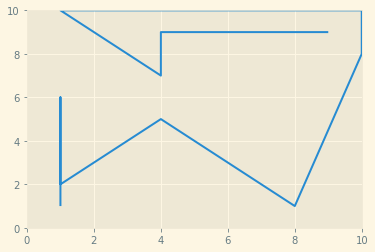

In [108]:
path = np.array(path)
plt.style.use('Solarize_Light2')
plt.plot(path[:,0],path[:,1])
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

## RandomPath function
 **'randomPath' only create one path.**
- maxTime = maximum time of one execution.
- minTimePP = minimum random time between two points of the path.
- maxTimePP = maximum random time between two points of the path.
- sizeH = Height - maximum value.
- sizeW = Width - maximum value.
    - the grid has a height interval of [-sizeH,sizeH] and a Width interval of [-sizeW,sizeW]
- flightAltitude = Flight altitude.
- posArrayInitial = Initial position index.

In [3]:
def comparison(numInitial,numFinal):
    sum = 0
    if numInitial > numFinal:
        sum = -1
    elif numInitial < numFinal:
        sum = 1
    return sum


def putLine(initIdx,finalIdx,matrix):
    
    #print(initIdx)
    #print(finalIdx)

    x_init = initIdx[0]
    y_init = initIdx[1]
    x_final = finalIdx[0]
    y_final = finalIdx[1]

    coor = np.array([initIdx])
    sum_x = comparison(x_init,x_final)
    sum_y = comparison(y_init,y_final)

    cont = 0

    while np.all(coor[-1,:]!=finalIdx) and cont <= 5:
        x = x_init + sum_x
        y = y_init + sum_y
        coor = np.append(coor,[[x,y]],axis=0)
        x_init = x
        y_init = y
        cont += 1
    
    #print(coor)

    for i in coor:
        matrix[i[0],i[1]] = 0
        
    return matrix,coor.tolist()
